# Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [94]:
df_click = pd.read_csv('click_stream.csv')
df_cust = pd.read_csv('customer.csv')
df_prod = pd.read_csv('product.csv',on_bad_lines='skip')
df_trans = pd.read_csv('transactions.csv')

In [95]:
df_trans.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [96]:
lis_info = [df_click, df_cust, df_prod, df_trans]
for i in lis_info:
    print(i.info())
    print('===========================================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   

In [6]:
df_trans.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount
count,852584.000000,852584.000000,852584.000000,852584.000000,852584.000000,8.525840e+05
mean,49839.202245,2042.077949,9189.675152,-5.111961,110.966216,5.499165e+05
std,28999.324142,3063.481424,9377.856335,3.081469,6.398510,8.153761e+05
min,3.000000,0.000000,0.000000,-10.995516,95.030728,1.089800e+04
25%,24563.000000,0.000000,0.000000,-7.377923,106.863926,2.037938e+05
50%,49619.000000,0.000000,10000.000000,-6.241318,110.168478,3.029890e+05
75%,74957.000000,3993.000000,10000.000000,-3.088419,113.194940,5.147022e+05
max,99999.000000,24519.000000,50000.000000,5.874791,141.006140,2.350449e+07


# Data Preprocessing

In [7]:
# Cek Info Data
for i in lis_info:
    print(i.isnull().sum())
    print('===========================================')



session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64
customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64
created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method      

In [8]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [9]:
# Ubah Tipe Data shipment_date_limit
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
#df_trans['shipment_date_limit'].dtypes

In [10]:
# Ubah tipe data created_id
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])
#df_trans['created_at'].dtypes

In [11]:
# Cek Tipe Data
df_trans.dtypes

created_at                datetime64[ns, UTC]
customer_id                             int64
booking_id                             object
session_id                             object
product_metadata                       object
payment_method                         object
payment_status                         object
promo_amount                            int64
promo_code                             object
shipment_fee                            int64
shipment_date_limit       datetime64[ns, UTC]
shipment_location_lat                 float64
shipment_location_long                float64
total_amount                            int64
dtype: object

In [12]:
# Cek Data Duplikat
df_trans.duplicated().sum()

0

In [13]:
# Cek Data Unik
df_trans.nunique()

created_at                852584
customer_id                50705
booking_id                852584
session_id                852584
product_metadata          852566
payment_method                 5
payment_status                 2
promo_amount               15180
promo_code                     8
shipment_fee                   6
shipment_date_limit       852584
shipment_location_lat     440963
shipment_location_long    440963
total_amount              469757
dtype: int64

In [14]:
# Cek Missing Value
df_trans.isnull().sum()
# 526048 missing value pada kolom promo_code
# di drop saja kah ? karena missing value nya banyak
# df_trans['promo_code'].value_counts()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [15]:
# Handling Missing Value
#df_trans.dropna(subset=['promo_code'], inplace=True)
df_trans['promo_code'].fillna('NOPROMO', inplace=True)
#df_trans['promo_code'].value_counts()
#df_trans.isnull().sum()

In [16]:
# Hapus spesial character pada kolom produtc_metadata
df_trans['product_metadata'].replace("[^\w\s]", ' ', regex=True, inplace=True)
#df_trans['product_metadata'].value_counts()

In [17]:
print('total pembelian tertinggi: ',df_trans['total_amount'].max())
print('total pembelian terendah: ',df_trans['total_amount'].min())

total pembelian tertinggi:  23504487
total pembelian terendah:  10898


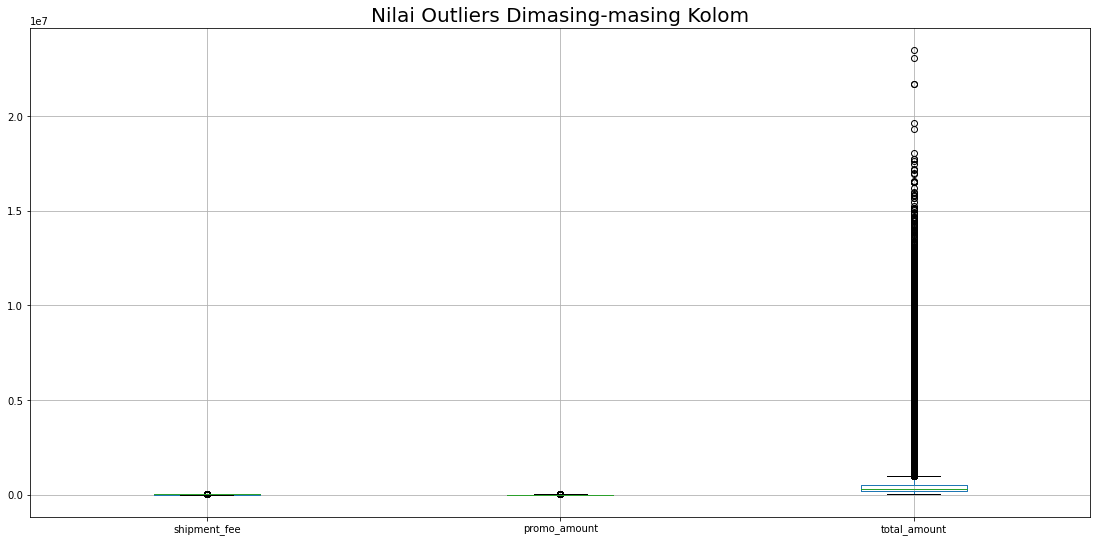

In [18]:
# Cek Data Outlier
# df_trans['total_amount'].describe()
cols = ['shipment_fee','promo_amount','total_amount']
plt.figure(figsize=(19,9))
df_trans[cols].boxplot()
plt.title('Nilai Outliers Dimasing-masing Kolom', fontsize=20)
plt.show()
# Untuk shipment_fee dan promo_amount tidak ada outliers
# Untuk total_amount ada outliers 
# Untul total_amount outliers nya di biarkan saja atau mau di handling?

In [ ]:
# Cek Outliers Dengan Z Score
# Referensi : https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
  data_outlier[col] = detect_outliers_zscore(df_trans[col])
  print('Outliers Dengan Metode Z Score(', col, ')', len(data_outlier[col]), 'outlier :', data_outlier[col])
  print('=====================================================================================================')


In [ ]:
# Handling Outliers (total_amount)
mean_total_amount = np.mean(df_trans['total_amount'])
mean_total_amount

for i in data_outlier['total_amount']:
    df_trans['total_amount'] = np.where(df_trans['total_amount'] == i, mean_total_amount, df_trans['total_amount'])
detect_outliers_zscore(df_trans['total_amount'])

In [ ]:
# Cek outliers setelah di handling
plt.figure(figsize=(19,9))
df_trans[cols].boxplot()
plt.title('Nilai Outliers Dimasing-masing Kolom', fontsize=20)
plt.show()
# Outliers sudah tidak ada
# Ini kalo mau di handling, kalo ga mau di handling juga gpp

# Insight Yang Dapat Diperoleh

In [19]:
import geopandas as gdp

In [20]:
gdf = gdp.GeoDataFrame(
    df_trans, geometry=gdp.points_from_xy(df_trans.shipment_location_long, df_trans.shipment_location_lat))

Text(0.5, 1.0, 'Shipment Location')

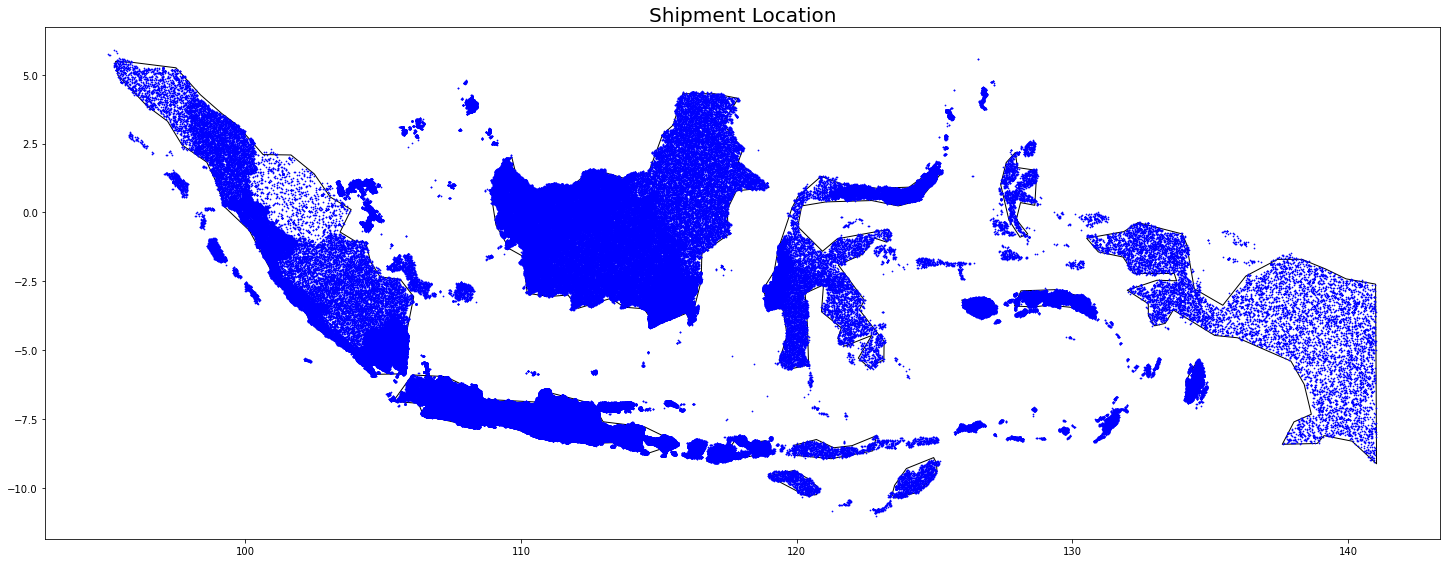

In [21]:
#gdf.head()
world = gdp.read_file(gdp.datasets.get_path("naturalearth_lowres"))

# plt.figure()
axis = world[world.name == "Indonesia"].plot(
    color = "white", edgecolor = "black", figsize=(25,10)
)

gdf.plot(ax = axis, color = "blue", markersize = 0.5)
plt.title("Shipment Location", fontsize=20)

## Jumlah status customer yang success dan failed
jumlah dari sucses atau beli lebih banyak dibandingkan yang tidak beli atau failed

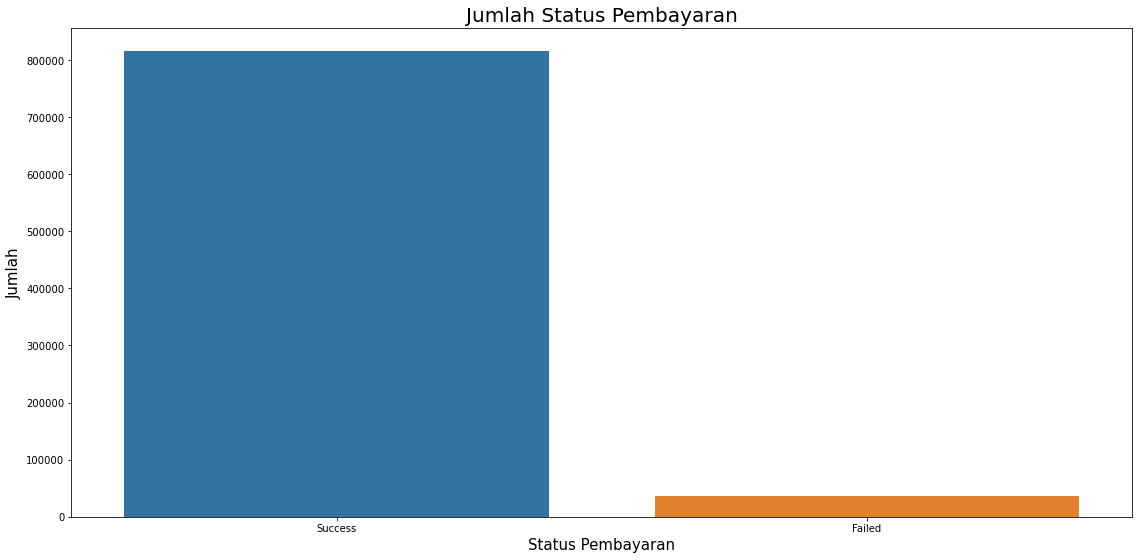

In [22]:
plt.figure(figsize=(19,9))
sns.countplot('payment_status', data=df_trans)
plt.title('Jumlah Status Pembayaran', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Status Pembayaran', fontsize=15)
plt.show()

## Jenis pembayaran yang paling banyak dilakukan oleh customer adalah ?

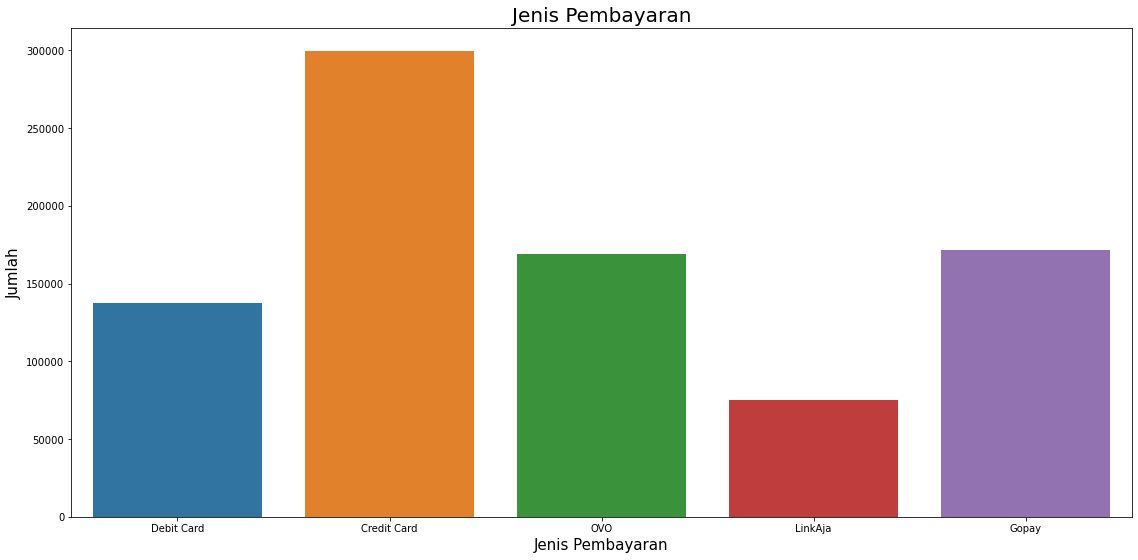

In [23]:
plt.figure(figsize=(19,9))
sns.countplot('payment_method', data=df_trans)
plt.title('Jenis Pembayaran', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Jenis Pembayaran', fontsize=15)
plt.show()

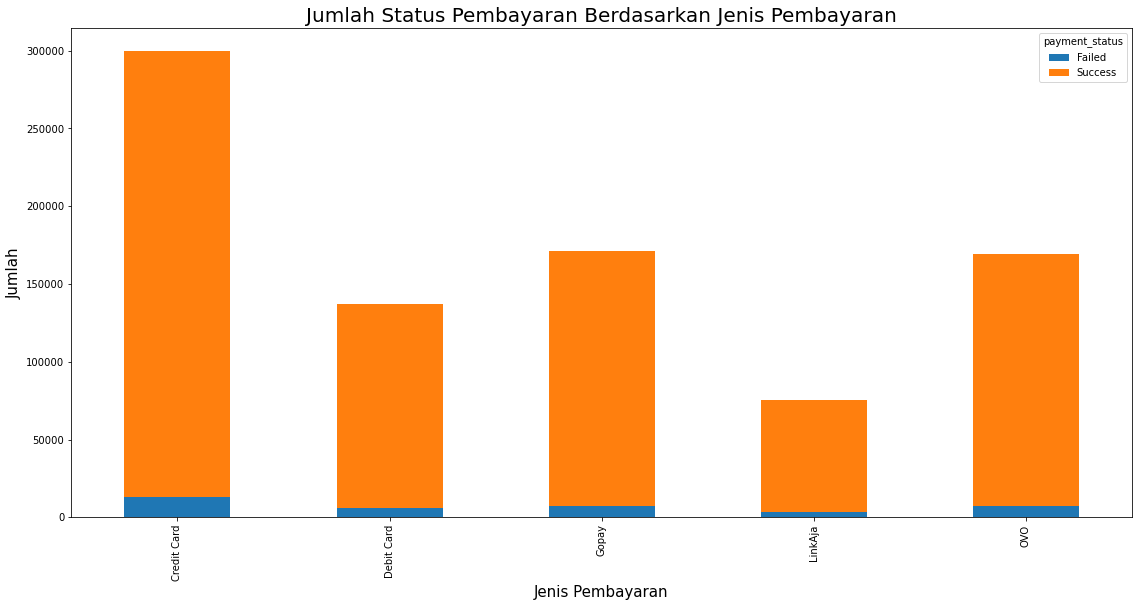

In [24]:
df_trans.groupby(['payment_method','payment_status']).size().unstack().plot(kind='bar',stacked=True, figsize=(19,9))
plt.title('Jumlah Status Pembayaran Berdasarkan Jenis Pembayaran', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Jenis Pembayaran', fontsize=15)
plt.show()

## Customer yang melakukan transaksi terbanyak

In [25]:
df_trans.groupby(['customer_id','total_amount'])['total_amount'].count().sort_values(ascending=False).head(5)
# Note : Tabel total_amount diatas adalah total_amount yang sudah di handling outliers nya

customer_id  total_amount
96241        227635          2
61822        145484          2
79206        236621          2
17737        312397          2
15356        184955          2
Name: total_amount, dtype: int64

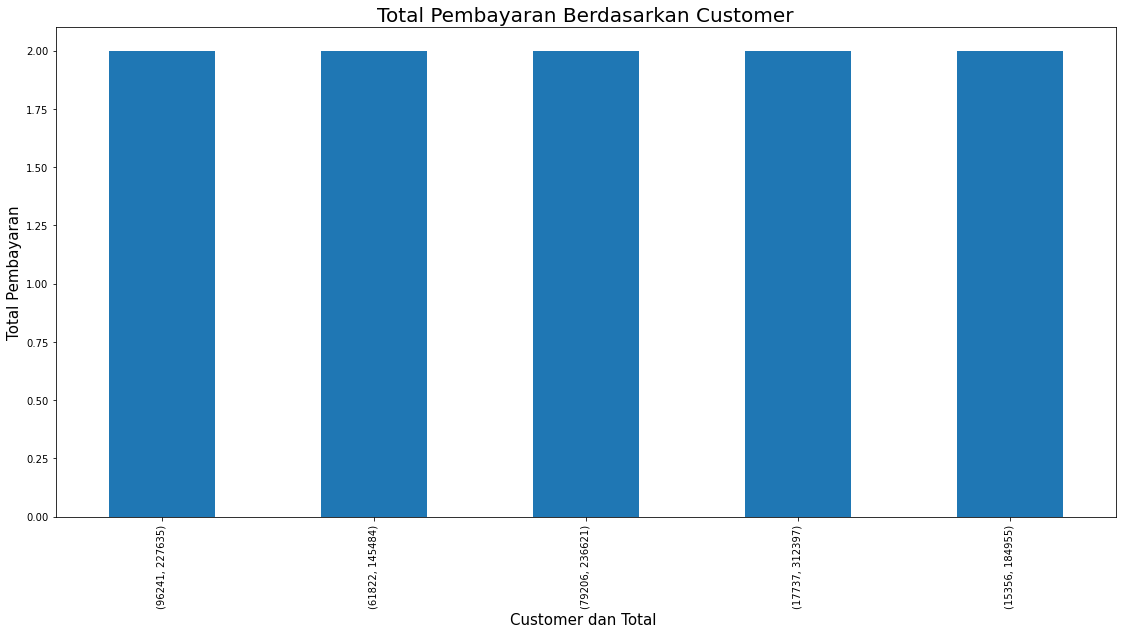

In [26]:
plt.figure(figsize=(19,9))
df_trans.groupby(['customer_id','total_amount'])['customer_id'].count().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Total Pembayaran Berdasarkan Customer', fontsize=20)
plt.ylabel('Total Pembayaran', fontsize=15)
plt.xlabel('Customer dan Total ', fontsize=15)
plt.show()

## Status pembayaran pada customer yang melakukan transaksi terbanyak adalah ?

In [27]:
df_trans.groupby(['customer_id','payment_status'])['customer_id'].count().sort_values(ascending=False).head(5)


customer_id  payment_status
43202        Success           550
29496        Success           505
82237        Success           503
10167        Success           460
69740        Success           458
Name: customer_id, dtype: int64

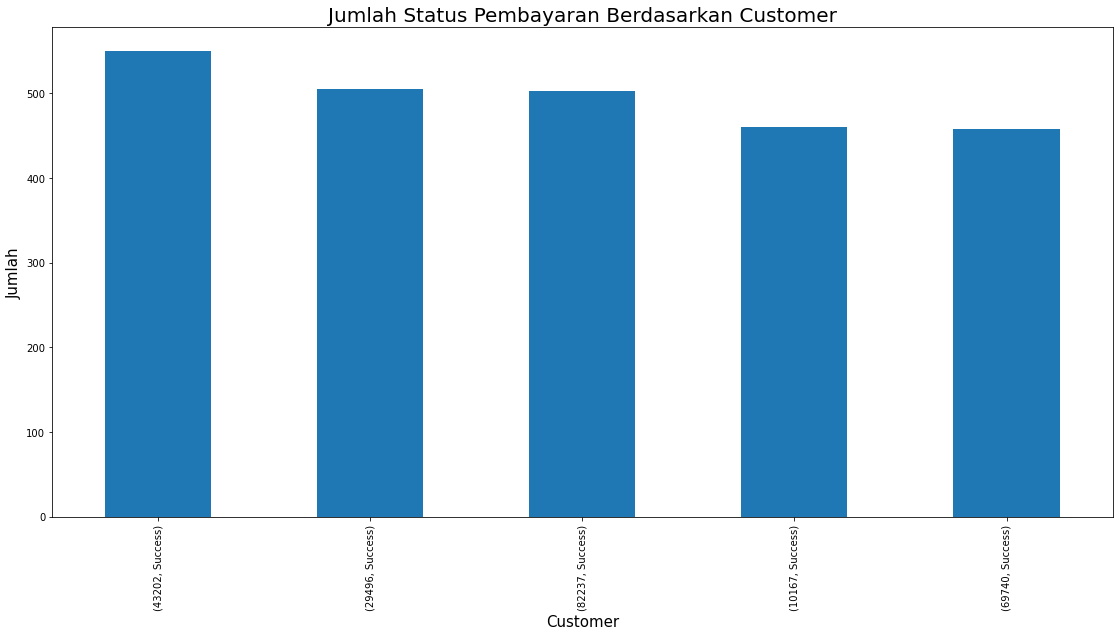

In [28]:
plt.figure(figsize=(19,9))
df_trans.groupby(['customer_id','payment_status'])['customer_id'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Jumlah Status Pembayaran Berdasarkan Customer', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Customer', fontsize=15)
plt.show()

## Metode pembayaran berdasarkan customer yang melakukan transaksi terbanyak adalah ?

In [29]:
df_trans.groupby(['payment_method'])['customer_id'].count().sort_values(ascending=False).head()
 

payment_method
Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: customer_id, dtype: int64

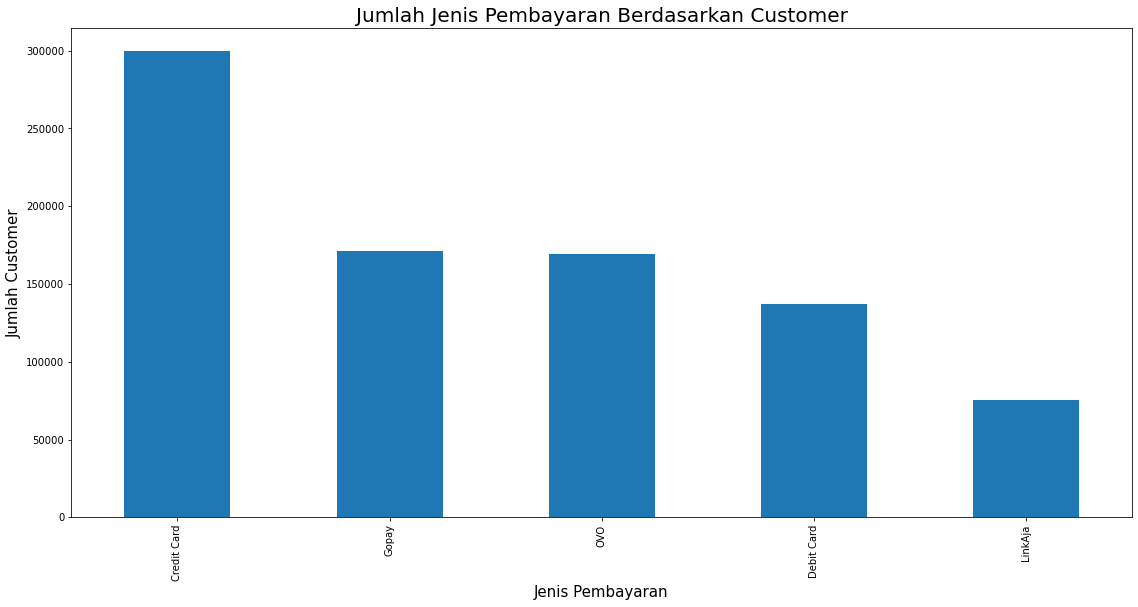

In [30]:
plt.figure(figsize=(19,9))
df_trans.groupby(['payment_method'])['customer_id'].count().sort_values(ascending=False).head().plot(kind='bar',stacked=True)
plt.title('Jumlah Jenis Pembayaran Berdasarkan Customer', fontsize=20)
plt.ylabel('Jumlah Customer', fontsize=15)
plt.xlabel('Jenis Pembayaran', fontsize=15)
plt.show()

## Code Promo yang paling banyak di gunakan oleh customer adalah weekendseru

In [31]:
df_trans.groupby(['promo_code'])['customer_id'].count().sort_values(ascending=False).head()

promo_code
NOPROMO        526048
AZ2022          89227
BUYMORE         66835
WEEKENDSERU     61941
XX2022          44744
Name: customer_id, dtype: int64

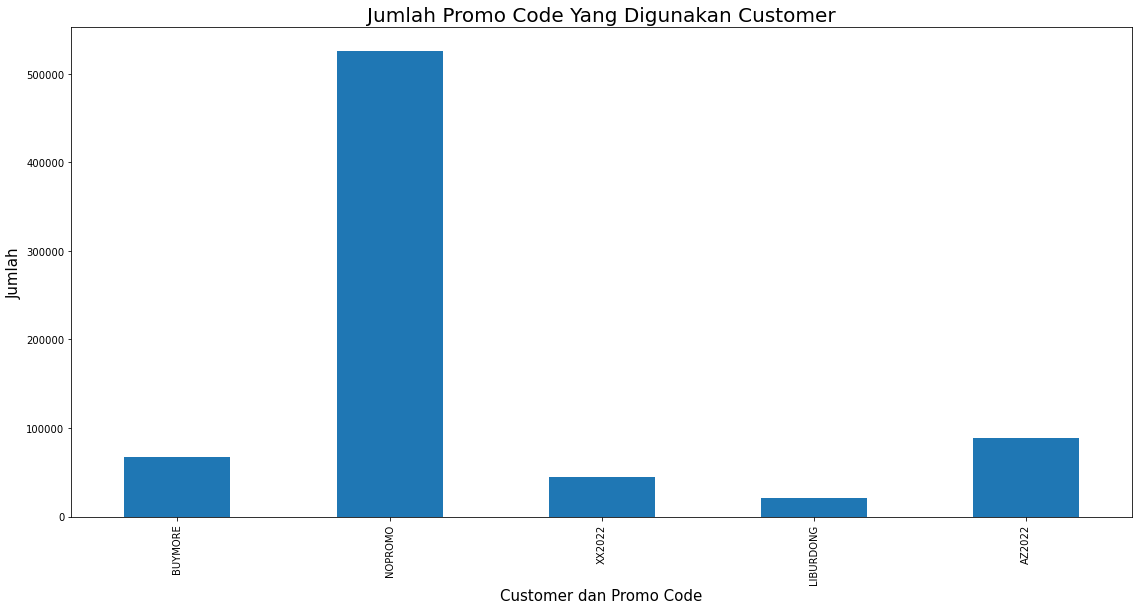

In [32]:
plt.figure(figsize=(19,9))
df_trans.groupby(['promo_code'])['customer_id'].count().sort_values(ascending=False).sample(5).plot(kind='bar',stacked=True)
plt.title('Jumlah Promo Code Yang Digunakan Customer', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Customer dan Promo Code', fontsize=15) 
plt.show()

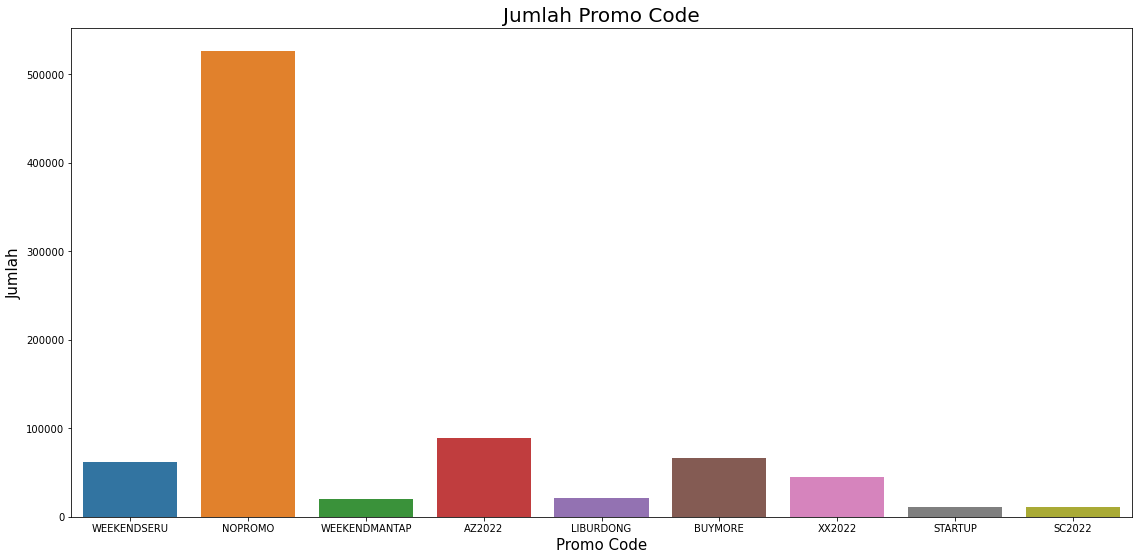

In [33]:
plt.figure(figsize=(19,9))
sns.countplot('promo_code', data=df_trans)
plt.title('Jumlah Promo Code', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Promo Code', fontsize=15)
plt.show()

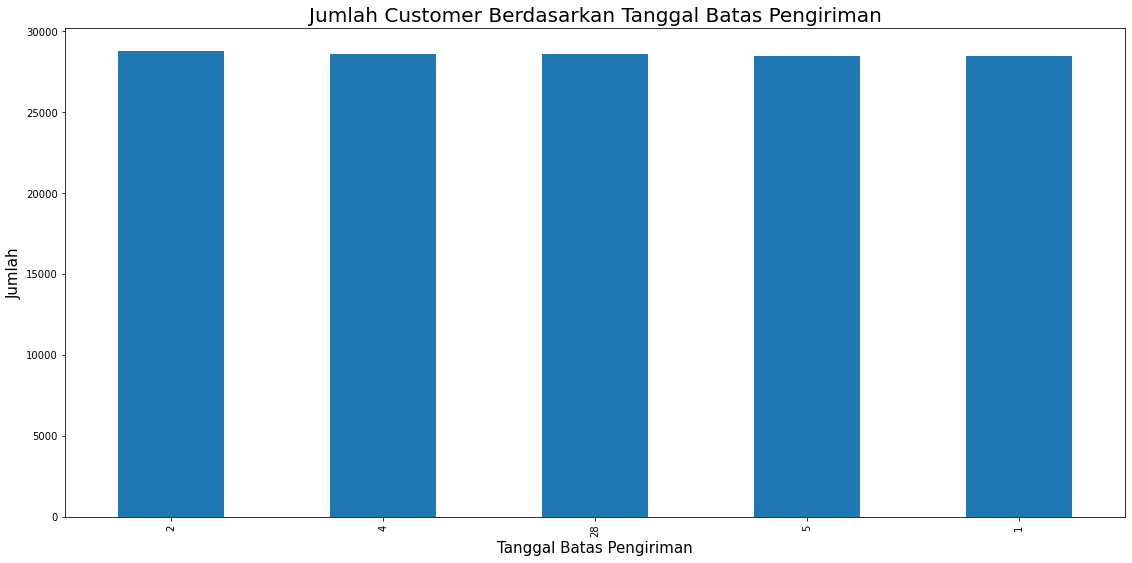

In [34]:
plt.figure(figsize=(19,9))
df_trans.groupby(df_trans['shipment_date_limit'].dt.day)['customer_id'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Jumlah Customer Berdasarkan Tanggal Batas Pengiriman', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Tanggal Batas Pengiriman', fontsize=15)
plt.show()

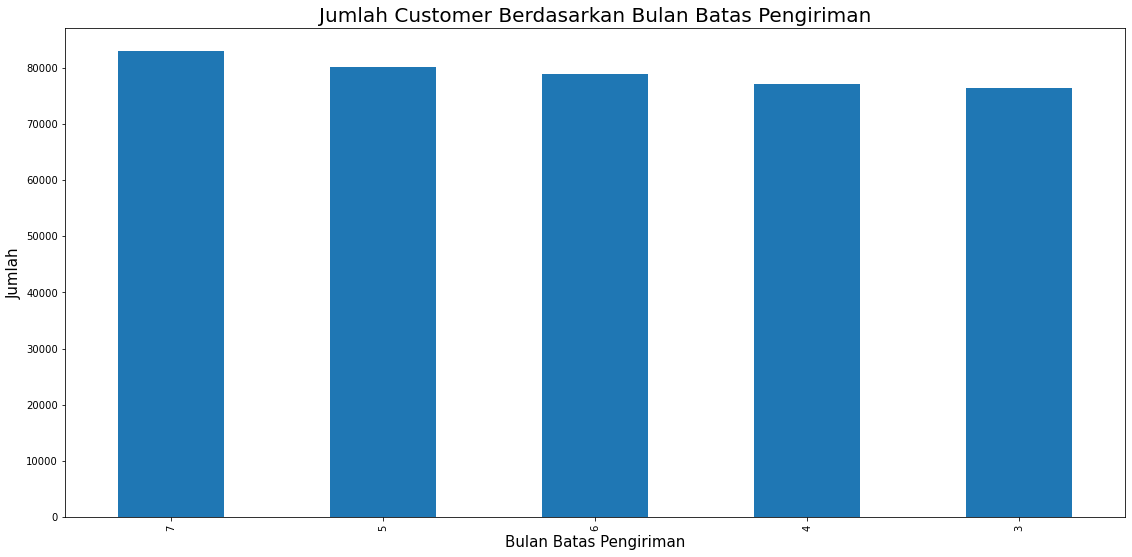

In [35]:
plt.figure(figsize=(19,9))
df_trans.groupby(df_trans['shipment_date_limit'].dt.month)['customer_id'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Jumlah Customer Berdasarkan Bulan Batas Pengiriman', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Bulan Batas Pengiriman', fontsize=15)
plt.show()

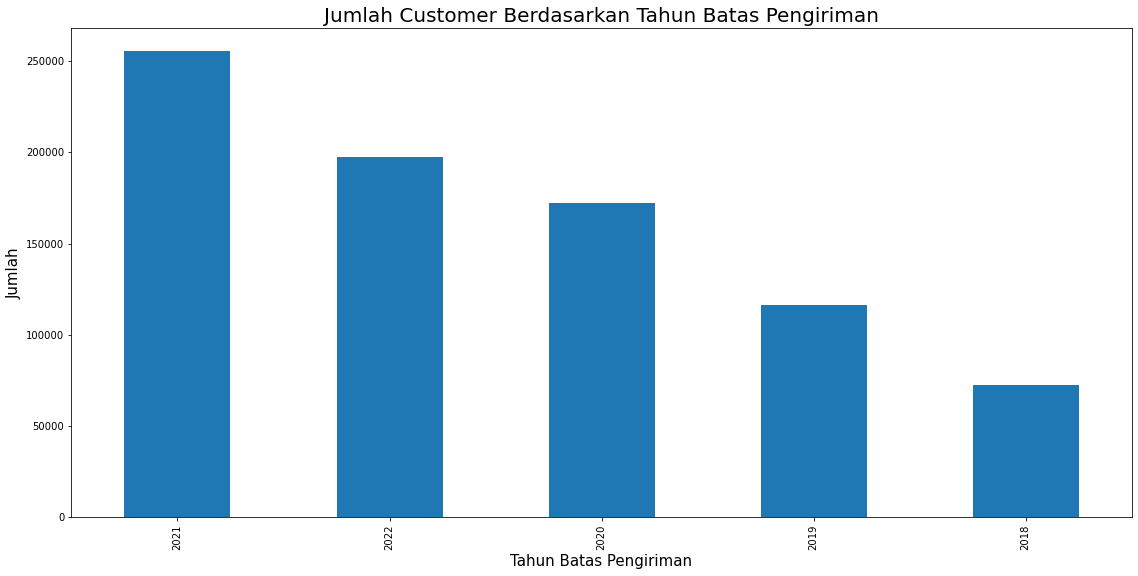

In [36]:
plt.figure(figsize=(19,9))
df_trans.groupby(df_trans['shipment_date_limit'].dt.year)['customer_id'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Jumlah Customer Berdasarkan Tahun Batas Pengiriman', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Tahun Batas Pengiriman', fontsize=15)
plt.show()

In [ ]:
#df_trans.to_csv (r'C:\\Users\\Desktop\\export_dataframe.csv', index = False, header=True)

#   Kesimpulan :
1. Terdapat outliers pada kolom total_amount, tapi kolom total_amount sendiri adalah jumlah total pembelian dari customer, sehingga outliers tidak dapat dihilangkan atau di handling.
2. Terdapat missing value pada kolom promo_code, ini langkah nya bagaimana? apakah di hapus saja atau bagaimana?
